In [3]:
import pandas as pd
import mysql.connector
import os

csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('order_items.csv', 'order_item'),
    ('payments.csv', 'payments'),
    ('products.csv', 'products'),
    ('sellers.csv', 'sellers.csv'),
    ('geolocation.csv', 'geolocation.csv')
]

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    port='3306',
    password='',
    database='ecommerce'
)
cursor = conn.cursor()

folder_path = r"C:\Users\Ak Gorwal\Documents\data analyst\python-sql"

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)
   
    df = df.where(pd.notnull(df), None)
   
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    conn.commit()

conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing payments.csv
NaN values before replacement:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
pay

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    username='root',
    port='3306',
    password='',
    database='ecommerce'
)
cur = db.cursor()



# List all unique cities where customers are located

In [2]:
query = """ select distinct(customer_city) from customers """


cur.execute(query)
data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017

In [3]:
query = """ SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017 """

cur.execute(query)
data = cur.fetchall()

data[0][0]

90202

# find the total sales per category

In [ ]:
query = """ select products.product_category category, sum(payments.payment_value)
from products join order_item
on products.product_id = order_item.product_id 
join payments
on payments.order_id = order_item.order_id 
group by category"""

cur.execute(query)
data = cur.fetchall()
data

# calculate the percentage of orders that were paid in installments

In [4]:
query = """ select (sum(case when payment_installments >= 1 then 1 
else 0 end))/count(*)*100 from payments """

cur.execute(query)
data = cur.fetchall()
data[0][0]


Decimal('99.9981')

# count the number of customers from each state

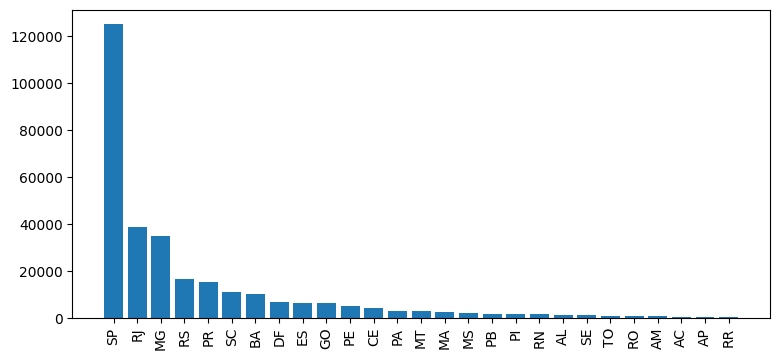

In [17]:
query = """ select customer_state, count(customer_id) from customers group by customer_state """

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["State", "Customers_count"])
df = df.sort_values(by='Customers_count', ascending=False)

plt.figure(figsize=(9,4))
plt.bar(df["State"], df["Customers_count"])
plt.xticks(rotation=90)
plt.show()

# Calculate the number of orders per month in 2028

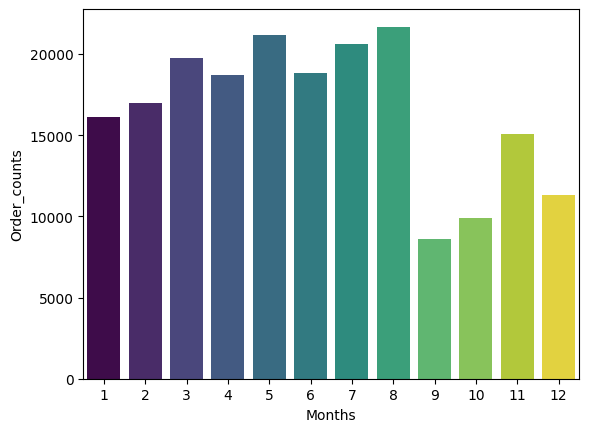

In [13]:
query = """ SELECT MONTH(order_purchase_timestamp) months, COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) GROUP BY months """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Months', 'Order_counts'])
o = ['January','February','March','April','May','June','July','August','September','October']

sns.barplot(x=df['Months'], y=df['Order_counts'], hue=df['Months'], data=df, palette='viridis', legend=False)
#ax.bar_labels(ax.containers[0])

#plt.bar(df['Months'],df['Order_counts'])
plt.show()

# find the average number of products per order, group by customer city

In [ ]:
query = """WITH count_per_order AS
(SELECT orders.order_id,orders.customer_id, COUNT(order_item.order_id) as oc
 from orders JOIN order_item
 ON orders.order_id = order_item.order_id
 GROUP BY orders.order_id)
 
 SELECT customers.customer_city, AVG(count_per_order.oc) average_orders
 from customers JOIN count_per_order
 ON customers.customer_id = count_per_order.customer_id
 GROUP BY customers.customer_city"""

cur.execute(query)
data = cur.fetchall()
data

# calculate the percentage of total revenue contributed by each product category

In [ ]:
query = """ SELECT products.product_category category,
(SUM(payments.payment_value)/(SELECT SUM(payment_value) from payments)*100 
 FROM products JOIN order_item 
 ON products.product_id = order_item.product_id 
 JOIN payments 
 ON payments.order_id = order_item.order_id 
 GROUP BY category """

cur.execute(query)
data = cur.fetchall()
data

# identify the correlation between product price and the number of times a product has been purchased

In [ ]:
query = """ SELECT products.product_category, COUNT(order_item.product_id),
AVG(order_item.price)
FROM products JOIN order_item
ON products.product_id = order_item.product_id
GROUP BY products.product_category """

cur.execute(query)
data = cur.fetchal()
data

# calculate the total revenue generated by each seller, and rank them by revenue

In [ ]:
query = """ SELECT *, DENSE_RANK() OVER(ORDER BY revenue DESC) as rn FROM
(SELECT order_item.seller_id, SUM(payments.payment_value)
 revenue FROM order_item JOIN payments
 ON order_item.order_id = payments.order_id
 GROUP BY order_item.seller_id )"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['seller_id', 'revenue'])
sns.barplot(x = 'seller_id', y = 'revenue', data=df)
plt.show()